In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import dataset

dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [10]:
# Training SOM
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

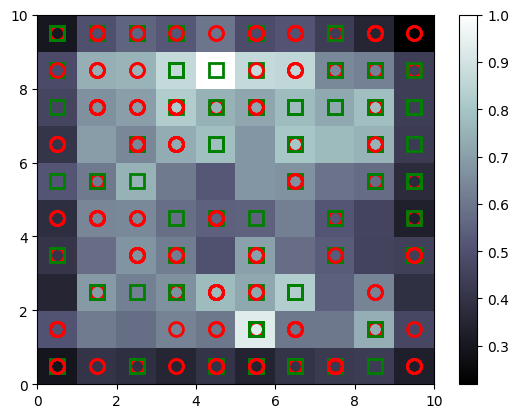

In [11]:
# Visualize results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)

show()

In [12]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5, 1)], mappings[(4, 8)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5775750e+07, 1.0000000e+00, 2.8250000e+01, 5.0400000e+00,
        1.0000000e+00, 8.0000000e+00, 5.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.4400000e+02, 8.0000000e+00],
       [1.5690372e+07, 1.0000000e+00, 2.1000000e+01, 3.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 1.0850000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 2.0000000e+00],
       [1.5775235e+07, 1.0000000e+00, 4.3080000e+01, 3.7500000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 3.7500000e-01,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.0000000e+02, 1.6300000e+02],
       [1.5780088e+07, 1.0000000e+00, 3.4500000e+01, 4.0400000e+00,
        1.0000000e+00, 3.0000000e+00, 5.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 7.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [15]:
# Create matrix of features
customers = dataset.iloc[:, 1:].values

# Creating dependent variable
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers = sc.fit_transform(customers)

In [18]:
# Build ANN
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units=2, kernel_initializer="uniform", activation="relu", input_dim=15))
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.fit(customers, is_fraud, batch_size=1, epochs=5)

Epoch 1/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.4400
Epoch 2/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.1842
Epoch 3/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.1258
Epoch 4/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0944
Epoch 5/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9826 - loss: 0.0724


In [36]:
# Predicting the probabilities of frauds

y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1], y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print("Probabilities: ", y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Probabilities:  [[1.56366260e+07 1.91914529e-04]
 [1.56739070e+07 3.09423252e-04]
 [1.56660960e+07 3.44241707e-04]
 ...
 [1.55723610e+07 2.28426546e-01]
 [1.56897810e+07 2.28426546e-01]
 [1.55881230e+07 2.28426546e-01]]
